In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS, OptimizedLatentFactorALS
from rekomenda.utils import load_data

In [3]:
dataset_coo  = load_data(filepath='../ml-32m/ratings.csv')

In [4]:
dataset_csr, dataset_csc = CSRMatrix.from_coo(dataset_coo), CSCMatrix.from_coo(dataset_coo)

In [5]:
whole_als = OptimizedLatentFactorALS(lambda_reg=0.1, n_factors=10, use_parallel=True)

In [9]:
start = time.time()
whole_als.fit(csr_matrix=dataset_csr, csc_matrix=dataset_csc,n_iterations=60,compute_metrics_every=5)
end = time.time()

print(f"Total time taken {end - start}")

Iteration 5/60 - RMSE: 0.7179, NLL: 8367597.7242
Iteration 10/60 - RMSE: 0.7058, NLL: 8073854.2364
Iteration 15/60 - RMSE: 0.7031, NLL: 8000958.1376
Iteration 20/60 - RMSE: 0.7022, NLL: 7973132.5881
Iteration 25/60 - RMSE: 0.7019, NLL: 7958355.5104
Iteration 30/60 - RMSE: 0.7016, NLL: 7948495.3311
Iteration 35/60 - RMSE: 0.7015, NLL: 7941204.3945
Iteration 40/60 - RMSE: 0.7014, NLL: 7935574.3521
Iteration 45/60 - RMSE: 0.7013, NLL: 7931120.8683
Iteration 50/60 - RMSE: 0.7012, NLL: 7927538.1179
Iteration 55/60 - RMSE: 0.7012, NLL: 7924616.5320
Iteration 60/60 - RMSE: 0.7012, NLL: 7922203.1801
Total time taken 1131.9495475292206


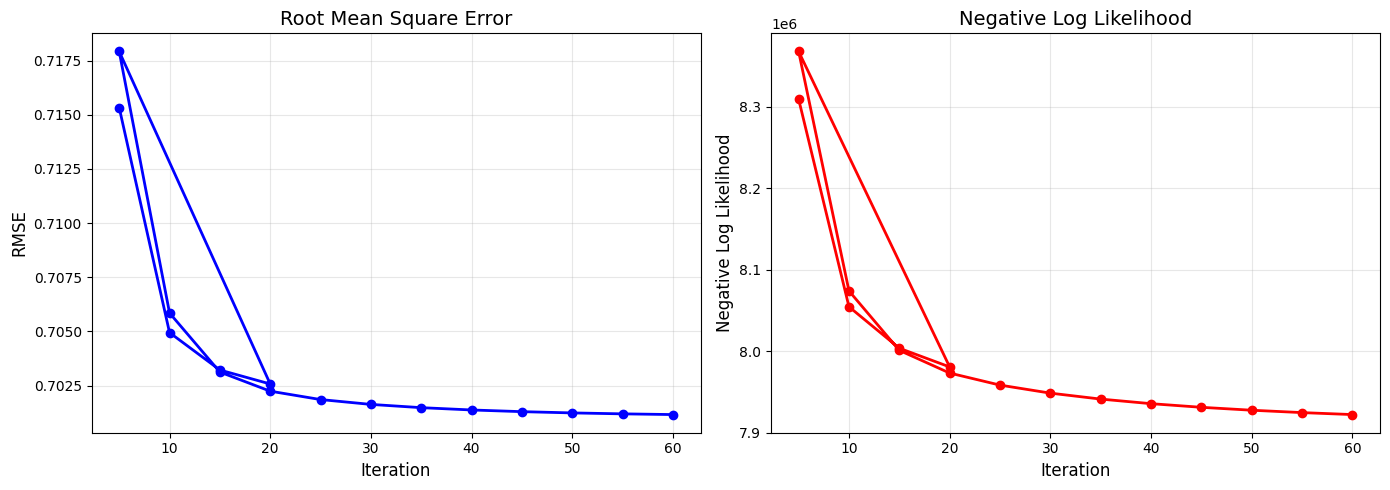

In [15]:
whole_als.plot_metrics(output='pics/als-bias-with-latent-whole-32m.pdf')

In [3]:
train, test  = load_data(filepath='../ml-32m/ratings.csv', split_ratio=0.8)

In [4]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [5]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [6]:
train_als = OptimizedLatentFactorALS(lambda_reg=0.1, n_factors=2, use_parallel=True)

In [7]:
start = time.time()
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=20,compute_metrics_every=5)
end = time.time()

print(f"Total time taken {end - start}")

Iteration 5/20 - RMSE: 0.7938, NLL: 8104007.9610
Iteration 10/20 - RMSE: 0.7901, NLL: 8023100.8486
Iteration 15/20 - RMSE: 0.7889, NLL: 7995805.4093
Iteration 20/20 - RMSE: 0.7880, NLL: 7975359.8088
Total time taken 264.6413314342499


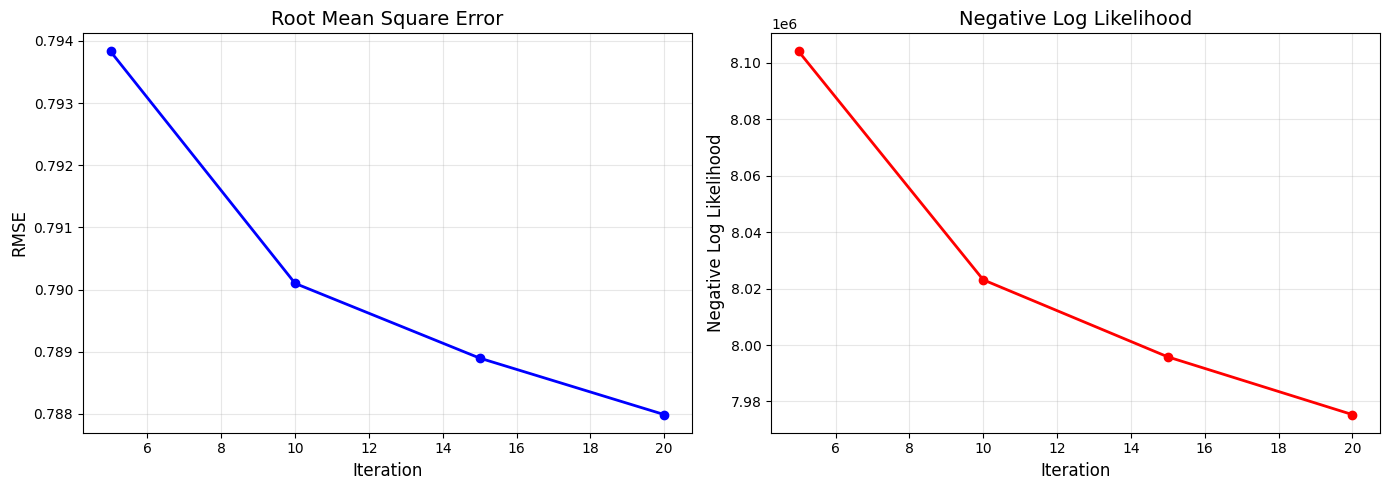

In [9]:
train_als.plot_metrics(output='pics/als-bias-with-latent-train-32m.pdf')

In [10]:
test_als = OptimizedLatentFactorALS(lambda_reg=0.1, n_factors=2, use_parallel=True)

In [11]:
start = time.time()
test_als.fit(csr_matrix=test_csr, csc_matrix=test_csc,n_iterations=20,compute_metrics_every=5)
end = time.time()

print(f"Total time taken {end - start}")

Iteration 5/20 - RMSE: 0.7789, NLL: 1971717.8976
Iteration 10/20 - RMSE: 0.7562, NLL: 1856535.2391
Iteration 15/20 - RMSE: 0.7523, NLL: 1834839.8564
Iteration 20/20 - RMSE: 0.7508, NLL: 1825492.0401
Total time taken 231.86159777641296


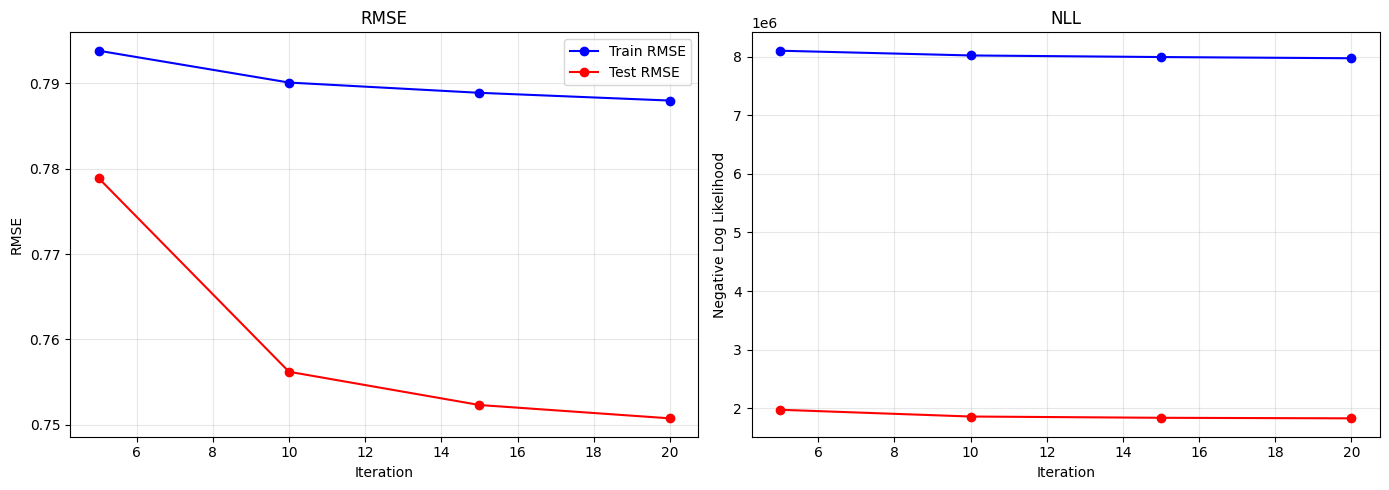

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(train_als.metrics.iterations, train_als.metrics.rmse, "b-o", label="Train RMSE")
ax1.plot(test_als.metrics.iterations, test_als.metrics.rmse, "r-o", label="Test RMSE")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("RMSE")
ax1.set_title("RMSE")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(train_als.metrics.iterations, train_als.metrics.neg_log_likelihood, "b-o")
ax2.plot(test_als.metrics.iterations, test_als.metrics.neg_log_likelihood, "r-o")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Negative Log Likelihood")
ax2.set_title("NLL")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pics/als-bias-latent-train-test-32m.pdf', format="pdf")
plt.show()